# SIMPLE NEURAL NETWORK

## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sys
# tf.enable_eager_execution()
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [2]:
is_correct_tf_version = '1.13.' in tf.__version__
assert is_correct_tf_version, "Wrong tensorflow version {} installed".format(tf.__version__)

## Inputs

#### Reading Dataset

In [3]:
df = pd.read_csv('data.csv')
df

,X1,X2,Y
0,4.0,5.0,1.0
1,2.0,1.0,0.0
2,2.0,2.0,0.0
3,5.0,6.0,1.0
4,3.0,4.0,1.0
5,3.0,4.0,1.0
6,1.0,2.0,0.0
7,5.0,4.0,1.0
8,6.0,3.0,0.0
9,4.0,2.0,1.0


#### Input Variable

In [4]:
X_data = df[['X1','X2']]
X = tf.Variable(X_data)
X

Instructions for updating:
Colocations handled automatically by placer.


<tf.Variable 'Variable:0' shape=(21, 2) dtype=float64_ref>

#### Output Variable

In [5]:
Y_data = df['Y']
Y = tf.Variable(Y_data)
Y

<tf.Variable 'Variable_1:0' shape=(21,) dtype=float64_ref>

#### Weights for hidden layer 1

In [6]:
Weights1 = np.array([[1.0,2.0],[3.0,-1.0],[-1.0,1.0]])
W1 = tf.Variable(Weights1.T)
W1

<tf.Variable 'Variable_2:0' shape=(2, 3) dtype=float64_ref>

#### Weights for output layer

In [7]:
Weights2 = np.array([[2.0,-1.0,3.0]])
W2 = tf.Variable(Weights2.T)
W2

<tf.Variable 'Variable_3:0' shape=(3, 1) dtype=float64_ref>

#### Plotting Dataset

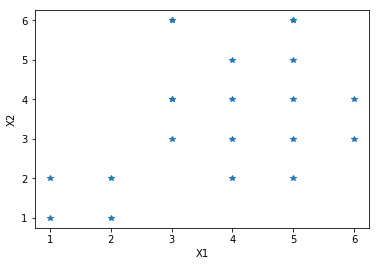

In [8]:
x1 = np.array(X_data['X1'])
x2 = np.array(X_data['X2'])
plt.plot(x1,x2,'*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Session

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Processing Hidden Layers

In [10]:
def hidden_layers(X,W):
    z = tf.matmul(X,W)
    return z

## Processing Output Layer

In [11]:
def output_layer(z,W):
    z = tf.matmul(z,W)
    y = tf.nn.sigmoid(z)
    return y

## Loss

In [12]:
def loss_calculation(Y,y):
    loss = tf.global_variables_initializer()
    accuracy = tf.global_variables_initializer()
    loss = tf.reduce_mean(tf.square(tf.subtract(Y,y)))
    loss/=21
    accuracy = 1-loss
    print("Loss: " + str(sess.run(loss)))
    print("Accuracy: " + str(sess.run(accuracy)))


## Running Model

In [13]:
z = hidden_layers(X_data,Weights1.T)
print("z = : \n",sess.run(z))
y = output_layer(z,Weights2.T)
print("y = : \n",sess.run(y))
loss_calculation(Y,y)

z = : 
 [[14.  7.  1.]
 [ 4.  5. -1.]
 [ 6.  4.  0.]
 [17.  9.  1.]
 [11.  5.  1.]
 [11.  5.  1.]
 [ 5.  1.  1.]
 [13. 11. -1.]
 [12. 15. -3.]
 [ 8. 10. -2.]
 [15.  3.  3.]
 [10.  9. -1.]
 [ 3.  2.  0.]
 [ 9.  6.  0.]
 [11. 12. -2.]
 [12.  8.  0.]
 [15.  3.  3.]
 [ 9. 13. -3.]
 [15. 10.  0.]
 [14. 14. -2.]
 [17.  9.  1.]]
y = : 
 [[1.        ]
 [0.5       ]
 [0.99966465]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999386]
 [0.99999386]
 [0.5       ]
 [0.5       ]
 [1.        ]
 [0.99966465]
 [0.98201379]
 [0.99999386]
 [0.98201379]
 [0.99999989]
 [1.        ]
 [0.01798621]
 [1.        ]
 [0.99966465]
 [1.        ]]
Loss: 0.012506733494088793
Accuracy: 0.9874932665059112


## Training

#### Standard deviation

In [14]:
s1 = np.std(X_data)
s1['X1']

1.4443572274383905

#### New Weights

In [15]:
lr=0.01
epoch=100
for i in range(0,epoch):
    new_wei1 = tf.subtract(Weights1,lr*Weights1)
    z = hidden_layers(X_data,tf.transpose(new_wei1))
    Weights1 = new_wei1
    
    new_wei2 = tf.subtract(Weights2,lr*Weights2)
    y = output_layer(z,tf.transpose(new_wei2))
    Weights2 = new_wei2
    if i%10 is 0:
        print("Epoch ",i+1,"has:")
        loss_calculation(Y,y)
        print()
    

Epoch  1 has:
Loss: 0.012498708262196956
Accuracy: 0.987501291737803

Epoch  11 has:
Loss: 0.012392891600251468
Accuracy: 0.9876071083997485

Epoch  21 has:
Loss: 0.012239619324742722
Accuracy: 0.9877603806752573

Epoch  31 has:
Loss: 0.012044935864079181
Accuracy: 0.9879550641359208

Epoch  41 has:
Loss: 0.011820084235201275
Accuracy: 0.9881799157647987

Epoch  51 has:
Loss: 0.011575986626052071
Accuracy: 0.9884240133739479

Epoch  61 has:
Loss: 0.01132135799456376
Accuracy: 0.9886786420054362

Epoch  71 has:
Loss: 0.011063450948347507
Accuracy: 0.9889365490516525

Epoch  81 has:
Loss: 0.010808655049894273
Accuracy: 0.9891913449501057

Epoch  91 has:
Loss: 0.010562924475275907
Accuracy: 0.989437075524724

